In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
%matplotlib inline

In [3]:
df = pd.read_csv('C:/Mettricx/Projetos/SupraAlimentos/PowerBI/Supra_Cli_Features.csv')

In [4]:
df.head()

,CNPJ,cliente,UF,cidade,bairro,latitude,longitude,Valor,Compras,P%_Compras,QtyCompras,frequencia,numCaixas
0,7394215000183,GILVERLAN BARBOSA SOUTO EPP,BA,NOVA VICOSA,VICOSA,-17.89,-39.37,184301.3617,704.52,0.006033,1,0.015090,2
1,23673682000107,ALINE FAVERO DO NASCIMENTO,BA,PRADO,SAO BRAS,-17.34,-39.22,157085.2382,886.80,0.007594,1,0.015090,1
2,9190998000109,SUPERMERCADO PAGANINI LTDA,ES,ANCHIETA,OLIVEIRA,-20.79,-40.65,111105.3093,668.00,0.005720,2,0.030180,2
3,31759699000444,COMERCIAL DEVENS LTDA,ES,ARACRUZ,COQUEIRAL,-19.82,-40.27,392874.5203,1350.46,0.011564,3,0.045269,6
4,31759699000363,COMERCIAL DEVENS LTDA.,ES,ARACRUZ,CENTRO,-19.82,-40.27,392874.5203,4533.71,0.038824,6,0.090539,14


In [5]:
a = df[(df['UF']=='RJ') & (df['cidade']=='QUEIMADOS') ]

In [6]:
a

,CNPJ,cliente,UF,cidade,bairro,latitude,longitude,Valor,Compras,P%_Compras,QtyCompras,frequencia,numCaixas
437,28891624000165,A A DE AZEVEDO SILVEIRA COMERCIO VAREJISTA DE ...,RJ,QUEIMADOS,CENTRO,-22.71,-43.55,727827.1365,1840.00,0.015756,3,0.045269,3
438,15403844000150,ACOUGUE VITORIA LTDA - ME,RJ,QUEIMADOS,CENTRO,-22.71,-43.55,727827.1365,168.92,0.001447,1,0.015090,2
439,13065191000111,RS MERCADO VAREJISTA LTDA - EPP,RJ,QUEIMADOS,CENTRO,-22.71,-43.55,727827.1365,25559.02,0.218870,12,0.181077,18


In [11]:
a = df['cidade']

In [14]:
a = a.drop_duplicates()

In [15]:
# 97 Cidades
a.count()

97

In [37]:
# 8 Estados
c = df['UF'].drop_duplicates()

In [39]:
c

0      BA
2      ES
88     MG
103    PA
104    PR
105    RJ
644    SC
645    SP
Name: UF, dtype: object

In [30]:

df1 = df[['cidade','bairro']]

In [32]:
df1 = df1.drop_duplicates()

In [36]:
# 442 Bairros
df1.head()

,cidade,bairro
0,NOVA VICOSA,VICOSA
1,PRADO,SAO BRAS
2,ANCHIETA,OLIVEIRA
3,ARACRUZ,COQUEIRAL
4,ARACRUZ,CENTRO


In [34]:
df1.count()

cidade    442
bairro    442
dtype: int64

In [56]:
df3 = df.groupby(['UF']).size()\
.reset_index(name='Pontos no Estado')\
.sort_values(by=['Pontos no Estado'],ascending=False, na_position='first').reset_index(drop=True)

In [57]:
df3

,UF,Pontos no Estado
0,RJ,539
1,ES,86
2,MG,15
3,SP,11
4,BA,2
5,PA,1
6,PR,1
7,SC,1


In [89]:
Vendas = df.groupby(['UF', 'cidade'])["Compras"]\
.sum()\
.sort_values(by=['Vendas na Cidade'],ascending=False, na_position='first')\



TypeError: sort_values() got an unexpected keyword argument 'by'

In [90]:
Vendas

UF  cidade                       
BA  NOVA VICOSA                         704.52
    PRADO                               886.80
ES  ANCHIETA                            668.00
    ARACRUZ                           13918.81
    BOM JESUS DO NORTE                 8421.31
    CACHOEIRO DE ITAPEMIRIM            4486.12
    CARIACICA                         11372.58
    COLATINA                          64064.97
    FUNDAO                             8853.96
    IBIRACU                            2566.18
    ICONHA                              810.00
    ITAGUACU                            728.81
    ITAPEMIRIM                         4070.32
    JOAO NEIVA                          574.80
    LINHARES                            324.36
    MANTENOPOLIS                       2390.43
    MARATAIZES                          816.54
    MARILANDIA                          636.55
    NOVA VENECIA                      10649.38
    PANCAS                              419.54
    PIUMA                 

In [67]:
cidades_Supra= df.groupby(['UF', 'cidade'])\
.size()\
.reset_index(name='Pontos no Estado')\
.sort_values(by=['Pontos no Estado'],ascending=False, na_position='first')\
.reset_index(drop=True)


In [68]:
cidades_Supra.head(20)

,UF,cidade,Pontos no Estado
0,RJ,SAO GONCALO,64
1,RJ,CABO FRIO,43
2,RJ,MACAE,38
3,RJ,RIO DE JANEIRO,31
4,RJ,ARARUAMA,28
5,RJ,DUQUE DE CAXIAS,25
6,RJ,RIO DAS OSTRAS,25
7,RJ,MARICA,22
8,RJ,NITEROI,19
9,RJ,ITABORAI,17


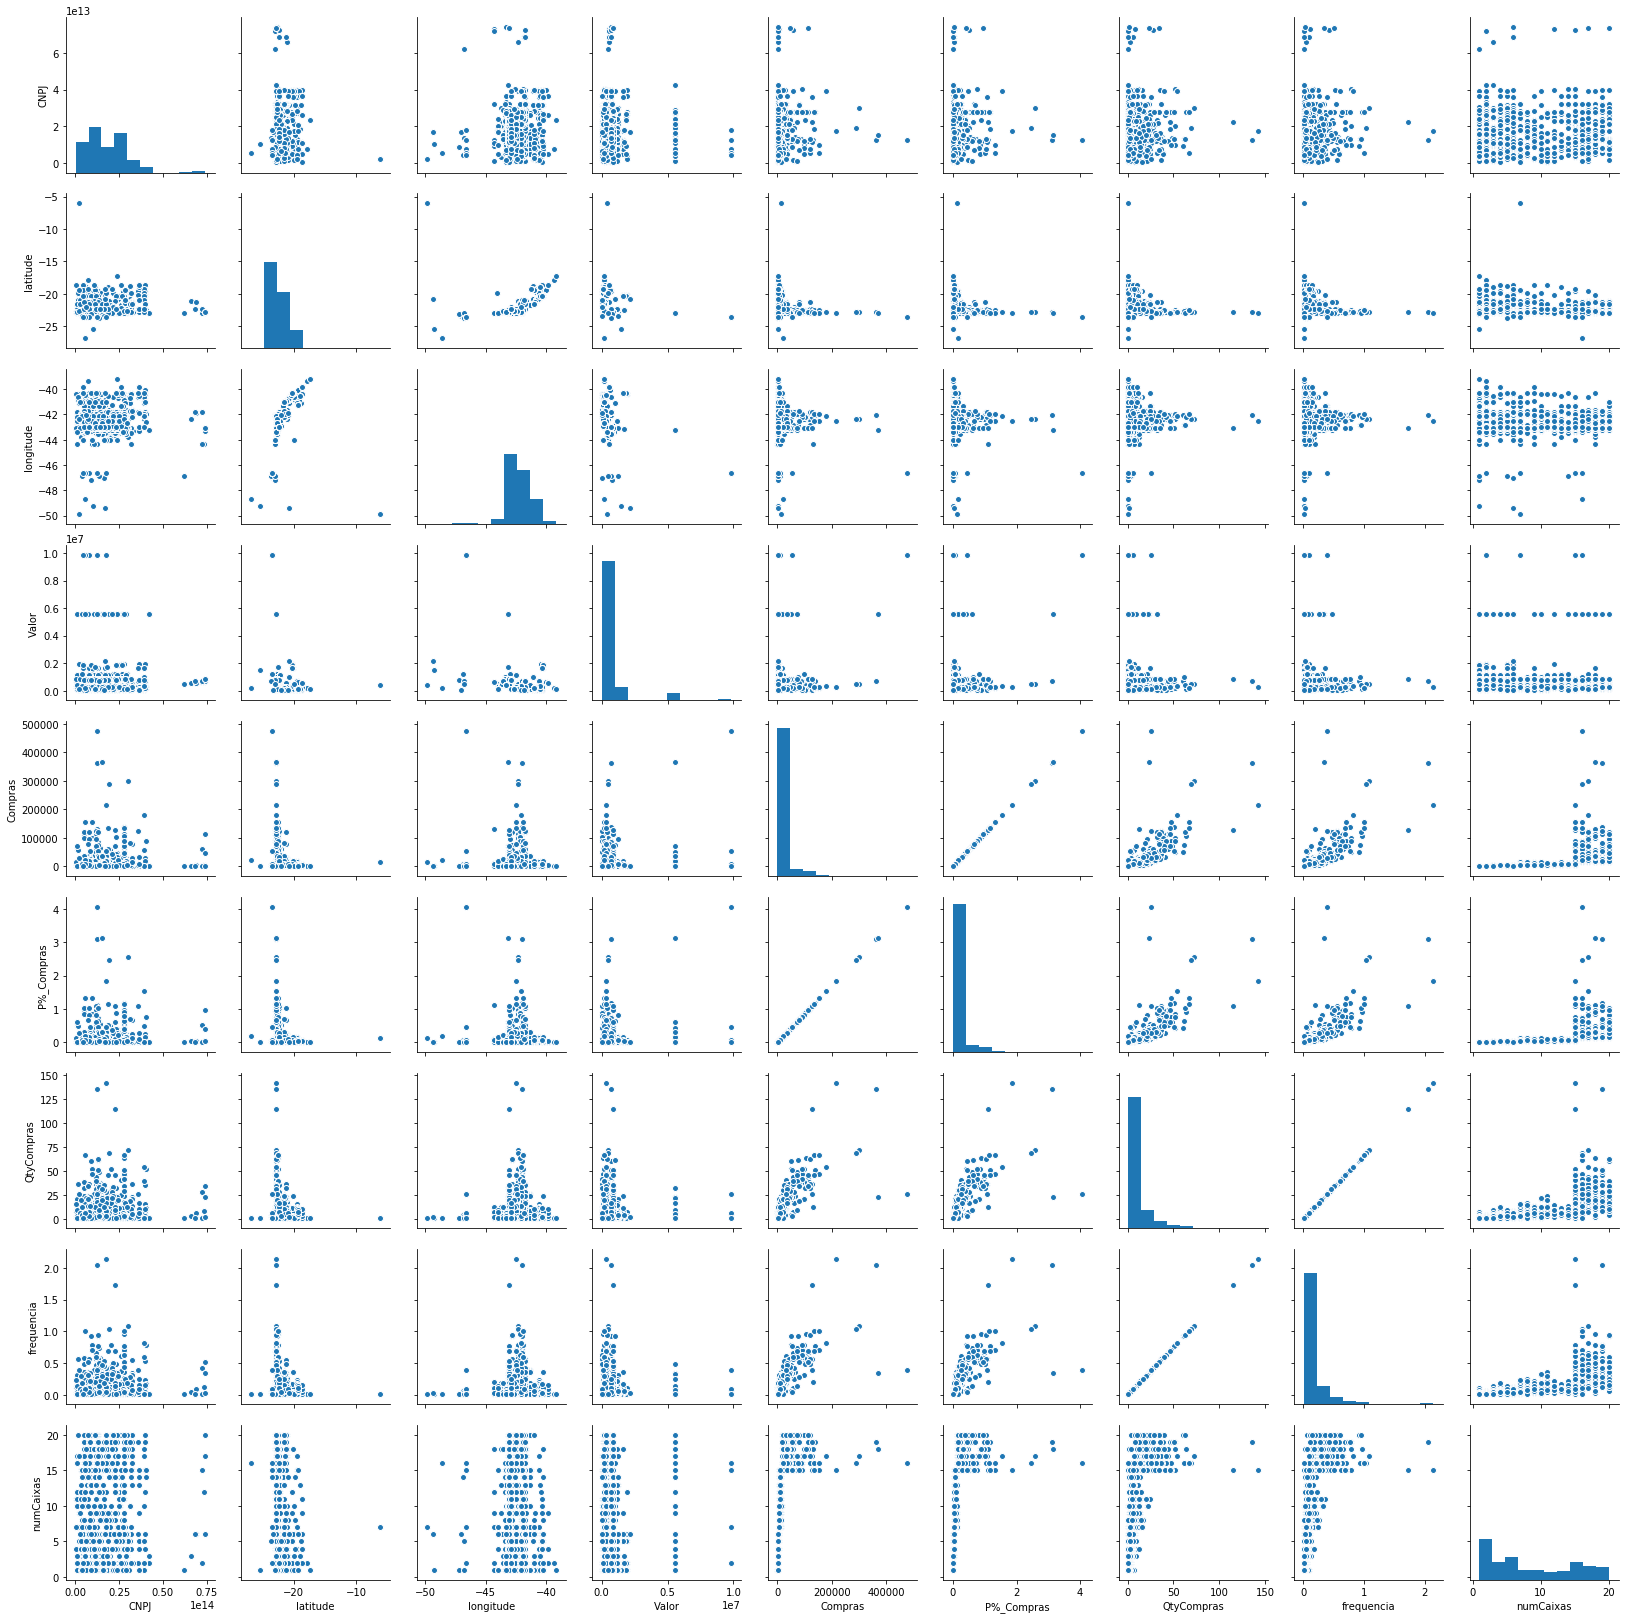

In [16]:
sns.pairplot(df)

In [18]:
df = df.sort_values(by=['cidade','bairro'],ascending=False, na_position='first').reset_index(drop=True)

In [21]:
df.head()

,CNPJ,cliente,UF,cidade,bairro,latitude,longitude,Valor,Compras,P%_Compras,QtyCompras,frequencia,numCaixas
0,39361142000110,COMERCIAL GIMAR LTDA,ES,VITORIA,VILA RUBIM,-20.31,-40.33,1649950.665,2627.38,0.022499,2,0.030180,5
1,12703414000166,DRIELLI GONCALVES PEREIRA - ME,ES,VITORIA,ROMAO,-20.31,-40.33,1649950.665,2127.87,0.018222,2,0.030180,5
2,11857211000161,HORTI FRUTIX JARDIM CAMBURI EIRELI - ME,ES,VITORIA,JARDIM CAMBURI,-20.31,-40.33,1649950.665,6558.36,0.056161,11,0.165988,9
3,26616381000121,HORTIFRUTIGRANJEIROS FASSARELLA & ROGGE LTDA -...,ES,VILA VELHA,VALE ENCANTADO,-20.33,-40.29,1836739.809,857.96,0.007347,1,0.015090,2
4,8929445000162,ECOREAL SUPERMERCADOS LTDA - ME,ES,VILA VELHA,TERRA VERMELHA,-20.33,-40.29,1836739.809,364.80,0.003124,1,0.015090,1


In [24]:
#Vendas = df[['UF','cidade','bairro']].groupby(df['UF','cidade','bairro']).sum().reset_index()
#df.groupby(['cidade', 'bairro']).size().groupby(level=1).max()

TypeError: You must first set_array for mappable

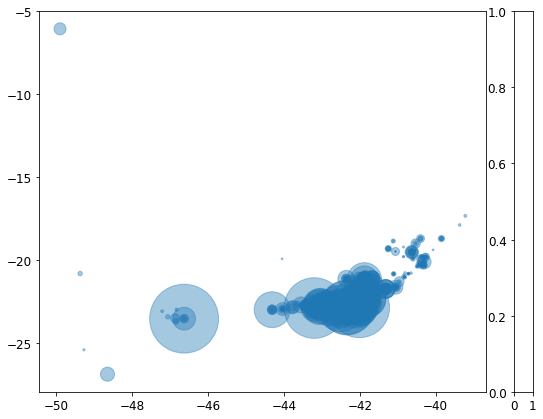

In [30]:
#cmap=plt.get_cmap("jet") c="median_house_value",
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df["Compras"]/100, label="population", figsize=(10,7), colorbar=True)
plt.legend()
#save_fig("housing_prices_scatterplot")